In [92]:
pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.5.3-py3-none-any.whl size=38459 sha256=8327ce90fff267dfc865ceebd9f89146797402c9f047e0cce47800c21bea5f47
  Stored in directory: /home/luisserrano/.cache/pip/wheels/f7/54/d6/ec34a2c6e62e4a8dace614a9a617bff39b7cccfb337cc36c98
Successfully built googlemaps
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install gmaps

     |████████████████████████████████| 1.1 MB 1.6 MB/s eta 0:00:01


  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076097 sha256=18c7fff33c6116065e70c3ad87940ac19eecb8539db109e75281bd0a9224098b
  Stored in directory: /home/luisserrano/.cache/pip/wheels/30/bd/87/d0d731ee712c34a4d6bace8b1dbf8c8932e22a1625b4a55be4
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [493]:
#Importamos librerías
import pandas as pd
import requests
import json
from dotenv import load_dotenv
import os
load_dotenv()
from pymongo import MongoClient,GEOSPHERE
import shapely.geometry
import googlemaps
import gmaps
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
gmaps.configure(api_key = clave)
clave = os.getenv("tokenG")


In [417]:
#Llamamos a la bbdd
client = MongoClient("localhost:27017")
db = client.get_database("Ironhack")
#Asigno una variable a la colección con la que voy a trabajar
c = db.get_collection("Companies")

In [325]:
client.list_database_names()

['Ironhack', 'admin', 'config', 'local']

In [326]:
c

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'Companies')

In [327]:
proy = {'_id': 0, "offices.latitude": 1,"offices.longitude": 1, "offices.address1": 1}
cond1 = {"category_code": "games_video"}
cond2 = {"founded_year": {"$gte": 2000}}
cond3 = {"number_of_employees":{"$gt": 60}}
cond4 = {"number_of_employees":{"$lt": 100}}
cond5 = {"offices.country_code": 'USA'}
list(c.find({"$and": [cond1,cond2,cond3,cond4,cond5]},proy))

[{'offices': [{'address1': '710 Ashepoint Way',
    'latitude': 17.415429,
    'longitude': 78.434422}]},
 {'offices': [{'address1': '',
    'latitude': 34.09316,
    'longitude': -118.378335}]},
 {'offices': [{'address1': '72 Madison Avenue',
    'latitude': 40.743877,
    'longitude': -73.98618}]}]

In [328]:
#Localización empresas
lata =17.415429
longa = 78.434422
latb = 34.09316
longb = -118.378335
latc = 40.743877
longc = -73.98618

In [329]:
#Distancias de los locales
party = 500
basket = 3000
veterinary = 2000

In [330]:
documentos = c.find()
documentos
documentos_lista = list(documentos)
len(documentos_lista)

18801

In [331]:
club = "drinks"
basketball="basketball"
vet = "veterinary"

In [332]:
# Clubs near company a
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lata},{longa}&radius={party}&keyword={club}&key={clave}"
payload={}
headers = {}
response1 = requests.request("GET", url, headers=headers, data=payload)
print(response11.text)

{
   "html_attributions" : [],
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 17.4103241,
               "lng" : 78.4372101
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 17.41171507989272,
                  "lng" : 78.43866907989272
               },
               "southwest" : {
                  "lat" : 17.40901542010728,
                  "lng" : 78.43596942010727
               }
            }
         },
         "icon" : "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png",
         "icon_background_color" : "#FF9E67",
         "icon_mask_base_uri" : "https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet",
         "name" : "Exotica Restaurant and Bar",
         "opening_hours" : {
            "open_now" : false
         },
         "photos" : [
            {
               "height" : 712,

In [333]:
a = response1.json()["results"]
dfa= pd.DataFrame(a)
dffa=dfa.filter(items=["name","geometry"])
dffa.insert(0,"type","Club")
dffa

,type,name,geometry
0,Club,Exotica Restaurant and Bar,"{'location': {'lat': 17.4103241, 'lng': 78.437..."
1,Club,"HAIKU, The Asian Kitchen","{'location': {'lat': 17.4121749, 'lng': 78.430..."
2,Club,S.A Haneef Cool Drinks Shop,"{'location': {'lat': 17.414345, 'lng': 78.4376..."
3,Club,Xenia Lounge,"{'location': {'lat': 17.4119203, 'lng': 78.433..."
4,Club,Touch Restaurant,"{'location': {'lat': 17.416468, 'lng': 78.4382..."


In [334]:
dffa.loc[0]["geometry"]["location"]["lat"]

17.4103241

#OJO CUIDAO ANORMAL

In [335]:
def latitud (x):
    return x["location"]["lat"]

In [336]:
def longitud (x):
    return x["location"]["lng"]

In [192]:
dffa["lng"] = dffa["geometry"].apply(latitud)

In [191]:
dffa["lat"] = dffa["geometry"].apply(latitud)

In [337]:
# Basketball stadium near company a
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lata},{longa}&radius={basket}&keyword={basketball}&key={clave}"
payload={}
headers = {}
response2 = requests.request("GET", url, headers=headers, data=payload)
print(response2.text)

{
   "html_attributions" : [],
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 17.4275301,
               "lng" : 78.44486280000001
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 17.42876587989272,
                  "lng" : 78.44617817989271
               },
               "southwest" : {
                  "lat" : 17.42606622010728,
                  "lng" : 78.44347852010728
               }
            }
         },
         "icon" : "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png",
         "icon_background_color" : "#7B9EB0",
         "icon_mask_base_uri" : "https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet",
         "name" : "Basket Ball Court",
         "opening_hours" : {
            "open_now" : false
         },
         "photos" : [
            {
               "height" : 108

In [338]:
b = response2.json()["results"]
dfb= pd.DataFrame(b)
dffb=dfb.filter(items=["name","geometry"])
dffb.insert(0,"type","Stadium")
dffb

,type,name,geometry
0,Stadium,Basket Ball Court,"{'location': {'lat': 17.4275301, 'lng': 78.444..."
1,Stadium,Basketball Court,"{'location': {'lat': 17.4006094, 'lng': 78.429..."
2,Stadium,Basketball Court,"{'location': {'lat': 17.3907271, 'lng': 78.419..."
3,Stadium,Basketball Court,"{'location': {'lat': 17.3969922, 'lng': 78.438..."
4,Stadium,Basketball Court,"{'location': {'lat': 17.4195216, 'lng': 78.408..."
5,Stadium,Basketball Court,"{'location': {'lat': 17.4004088, 'lng': 78.425..."
6,Stadium,Basketball Court,"{'location': {'lat': 17.4188527, 'lng': 78.410..."
7,Stadium,Basketball Court,"{'location': {'lat': 17.3980922, 'lng': 78.438..."
8,Stadium,Basketball Court,"{'location': {'lat': 17.3981543, 'lng': 78.441..."
9,Stadium,Chinmaya Basket Ball Court,"{'location': {'lat': 17.4360756, 'lng': 78.459..."


In [339]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lata},{longa}&radius={basket}&keyword={vet}&key={clave}"
payload={}
headers = {}
response3 = requests.request("GET", url, headers=headers, data=payload)
print(response3.text)

{
   "html_attributions" : [],
   "next_page_token" : "Aap_uEATZ0htzmcSrr8_wtre_dZTEqzuR7mzMhxeOPqosAalln7Yrr-ckNSJydoemHwFqSyR3LkHv_UEzyfJ1RSHe5SR7a9Mdli8cozlH_Rg_AjJdi-f0SmPzecZDqrx15532AyzC5S-Fm_KfIRrT73P56Yl5x4tpDI9dr3RhjnO2NVQ0MC7aRgDASTELYX3rmkInH21BjVCzMPVFW3zmeZbKLFh1QNEnAVj_Q-1d0G3nMjbhG-8RayVaJof-J6xQWes6FwjqW42RJq85VZHPksLKDXXF9lee7SgmENFO0no2ammGOz3-5Mq86E7EXX_INNxZaHoHfHROd99nAVpPuscDWzi_1TmqodolXL4ujypylGa8jytsIKu91anhawvK3U_9QLpf_8_wzdB2udXtXRGGrc4taoBYQNBtq7S9R38rVcnYPCBlHIrhp9FSMqt",
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 17.4265905,
               "lng" : 78.4350802
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 17.42790787989272,
                  "lng" : 78.43642622989273
               },
               "southwest" : {
                  "lat" : 17.42520822010727,
                  "lng" : 78.43372657010728
     

In [340]:
c = response3.json()["results"]
dfc= pd.DataFrame(c)
dffc=dfc.filter(items=["name","geometry"])
dffc.insert(0,"type","Vet")
dffc

,type,name,geometry
0,Vet,Allvet Pet Clinic,"{'location': {'lat': 17.4265905, 'lng': 78.435..."
1,Vet,VETERINARY CLINIC,"{'location': {'lat': 17.434128, 'lng': 78.4290..."
2,Vet,Claws & Paws,"{'location': {'lat': 17.4152158, 'lng': 78.438..."
3,Vet,Andhra Pradesh Veternary Association Hall,"{'location': {'lat': 17.4030707, 'lng': 78.456..."
4,Vet,PET CARE CLINIC,"{'location': {'lat': 17.3935707, 'lng': 78.442..."
5,Vet,Veterinary Dispensary,"{'location': {'lat': 17.4144464, 'lng': 78.422..."
6,Vet,Veterinary Public Health Association,"{'location': {'lat': 17.4011208, 'lng': 78.455..."
7,Vet,The Animal Care Clinic,"{'location': {'lat': 17.4213795, 'lng': 78.441..."
8,Vet,Government Veterinary Hospital,"{'location': {'lat': 17.3982254, 'lng': 78.454..."
9,Vet,Dr Dog Pet Hospital,"{'location': {'lat': 17.4148214, 'lng': 78.421..."


In [341]:
india = pd.concat([dffa,dffb,dffc], ignore_index=True)
#india

## Segunda Empresa

In [342]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latb},{longb}&radius={party}&keyword={club}&key={clave}"
payload={}
headers = {}
response4 = requests.request("GET", url, headers=headers, data=payload)
print(response4.text)

{
   "html_attributions" : [],
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 34.0940986,
               "lng" : -118.3760243
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 34.09562192989272,
                  "lng" : -118.3747515701073
               },
               "southwest" : {
                  "lat" : 34.09292227010727,
                  "lng" : -118.3774512298927
               }
            }
         },
         "icon" : "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/bar-71.png",
         "icon_background_color" : "#FF9E67",
         "icon_mask_base_uri" : "https://maps.gstatic.com/mapfiles/place_api/icons/v2/bar_pinlet",
         "name" : "Juniper",
         "opening_hours" : {
            "open_now" : false
         },
         "photos" : [
            {
               "height" : 562,
               "html_attribu

In [343]:
d = response4.json()["results"]
dfd= pd.DataFrame(d)
dffd=dfd.filter(items=["name","geometry"])
dffd.insert(0,"type","Club")
dffd

,type,name,geometry
0,Club,Juniper,"{'location': {'lat': 34.0940986, 'lng': -118.3..."
1,Club,Eveleigh,"{'location': {'lat': 34.0912312, 'lng': -118.3..."
2,Club,Bar 20 on Sunset,"{'location': {'lat': 34.0945491, 'lng': -118.3..."
3,Club,Bar 1200,"{'location': {'lat': 34.0922201, 'lng': -118.3..."
4,Club,State Social House,"{'location': {'lat': 34.0908487, 'lng': -118.3..."
5,Club,Barney's Beanery,"{'location': {'lat': 34.0908203, 'lng': -118.3..."
6,Club,Harriet's Rooftop,"{'location': {'lat': 34.0941621, 'lng': -118.3..."
7,Club,Skybar Los Angeles,"{'location': {'lat': 34.0946455, 'lng': -118.3..."
8,Club,Rock & Reilly's,"{'location': {'lat': 34.0908352, 'lng': -118.3..."
9,Club,Pi On Sunset - West Hollywood,"{'location': {'lat': 34.0904187, 'lng': -118.3..."


In [344]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latb},{longb}&radius={basket}&keyword={basketball}&key={clave}"
payload={}
headers = {}
response5 = requests.request("GET", url, headers=headers, data=payload)
print(response5.text)

{
   "html_attributions" : [],
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 34.0803829,
               "lng" : -118.3909947
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 34.08174087989272,
                  "lng" : -118.3896520701073
               },
               "southwest" : {
                  "lat" : 34.07904122010728,
                  "lng" : -118.3923517298928
               }
            }
         },
         "icon" : "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png",
         "icon_background_color" : "#7B9EB0",
         "icon_mask_base_uri" : "https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet",
         "name" : "Professional Basketball Coach",
         "place_id" : "ChIJzQ9FTsukwoAR84FqHJbWYGc",
         "plus_code" : {
            "compound_code" : "3JJ5+5J Beverly Hil

In [345]:
e = response5.json()["results"]
dfe= pd.DataFrame(e)
dffe=dfe.filter(items=["name","geometry"])
dffe.insert(0,"type","Stadium")
dffe

,type,name,geometry
0,Stadium,Professional Basketball Coach,"{'location': {'lat': 34.0803829, 'lng': -118.3..."
1,Stadium,JEM Community Center,"{'location': {'lat': 34.0648076, 'lng': -118.4..."
2,Stadium,Poinsettia Recreation Center,"{'location': {'lat': 34.088031, 'lng': -118.34..."
3,Stadium,Cabo Surf Lessons,"{'location': {'lat': 34.0731387, 'lng': -118.3..."
4,Stadium,Foot Locker,"{'location': {'lat': 34.075331, 'lng': -118.37..."
5,Stadium,LA-Sports Kidz,"{'location': {'lat': 34.0753861, 'lng': -118.3..."


In [346]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latb},{longb}&radius={veterinary}&keyword={vet}&key={clave}"
payload={}
headers = {}
response6 = requests.request("GET", url, headers=headers, data=payload)
print(response6.text)

{
   "html_attributions" : [],
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 34.087491,
               "lng" : -118.381002
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 34.08878757989272,
                  "lng" : -118.3796275201073
               },
               "southwest" : {
                  "lat" : 34.08608792010727,
                  "lng" : -118.3823271798927
               }
            }
         },
         "icon" : "https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png",
         "icon_background_color" : "#7B9EB0",
         "icon_mask_base_uri" : "https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet",
         "name" : "VCA Los Angeles Veterinary Specialists",
         "opening_hours" : {
            "open_now" : false
         },
         "photos" : [
            {
             

In [347]:
f = response6.json()["results"]
dff= pd.DataFrame(f)
dfff=dff.filter(items=["name","geometry"])
dfff.insert(0,"type","Vet")
dfff

,type,name,geometry
0,Vet,VCA Los Angeles Veterinary Specialists,"{'location': {'lat': 34.087491, 'lng': -118.38..."
1,Vet,Laurel Pet Hospital,"{'location': {'lat': 34.0906767, 'lng': -118.3..."
2,Vet,Modern Animal,"{'location': {'lat': 34.0758119, 'lng': -118.3..."
3,Vet,West Hollywood Animal Hospital,"{'location': {'lat': 34.0825249, 'lng': -118.3..."
4,Vet,VCA TLC Animal Hospital,"{'location': {'lat': 34.087472, 'lng': -118.38..."
5,Vet,VCA Miller-Robertson Animal Hospital,"{'location': {'lat': 34.081096, 'lng': -118.38..."
6,Vet,The Melrose Vet,"{'location': {'lat': 34.08345, 'lng': -118.370..."
7,Vet,Fox Companion Care,"{'location': {'lat': 34.0900091, 'lng': -118.3..."
8,Vet,Beverly Hills Small Animal Hospital - John Win...,"{'location': {'lat': 34.0752234, 'lng': -118.3..."
9,Vet,Dr Shipp's Animal Hospital,"{'location': {'lat': 34.075126, 'lng': -118.39..."


In [348]:
la = pd.concat([dffd,dffe,dfff], ignore_index=True)
#la

## Tercer sitio

In [349]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latc},{longc}&radius={party}&keyword={club}&key={clave}"
payload={}
headers = {}
response7 = requests.request("GET", url, headers=headers, data=payload)
print(response7.text)

{
   "html_attributions" : [],
   "next_page_token" : "Aap_uEASr_80I8oLD0cX2CQulSgyHj44PT513RnwLsyeCrtlpwNKAw_crJDHDD8fFlk1CjqkjFDFDTnoCuTC-ZHPJpZrqAJtks_xCfj82dFwUuO4xTbitjzMdvx2s-Jpsf9KLRumJcqL6ddrRbTBUX9682M1CpOG1jdFBRe38cwA7S7bibq618JJLgnuRuU_0GaJwkGI44EBayA8q7G_pQs0SZAu8Zobqx180BtamnfLM0Aqiei58VkfyL21Cn6ZnKFNxKKUJ3OZp0da2r802heuUyEb7VnwwOXzHnKnYMxfz7a-8eMEzAPfYsEGvAo_hZLVzsNDfV4Fw3elE45EuAd23jobSFVGhbIfTW-UgdG0LmVOz76MRHA3JOCBC89DlxQm3XcF-n5m_vRnkdhFyPlEd_IBuXA1QVCsA0hU0QKgO-pkw00ffsERWOk",
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 40.744724,
               "lng" : -73.9869413
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 40.74607382989272,
                  "lng" : -73.98559147010728
               },
               "southwest" : {
                  "lat" : 40.74337417010728,
                  "lng" : -73.98829112989272
        

In [350]:
g = response7.json()["results"]
dfg= pd.DataFrame(g)
dffg=dfg.filter(items=["name","geometry"])
dffg.insert(0,"type","Club")
dffg

,type,name,geometry
0,Club,John Doe Bar & Kitchen,"{'location': {'lat': 40.744724, 'lng': -73.986..."
1,Club,Roof at Park South,"{'location': {'lat': 40.74237979999999, 'lng':..."
2,Club,Harding's,"{'location': {'lat': 40.7393229, 'lng': -73.98..."
3,Club,Punch Bar & Grill,"{'location': {'lat': 40.7396367, 'lng': -73.98..."
4,Club,Patent Pending,"{'location': {'lat': 40.7453222, 'lng': -73.99..."
5,Club,The Clocktower,"{'location': {'lat': 40.741295, 'lng': -73.987..."
6,Club,Thyme Bar,"{'location': {'lat': 40.7417143, 'lng': -73.99..."
7,Club,Cloud Social Rooftop Bar,"{'location': {'lat': 40.747317, 'lng': -73.986..."
8,Club,Brother Jimmy's,"{'location': {'lat': 40.7445325, 'lng': -73.98..."
9,Club,BLACKBARN Restaurant,"{'location': {'lat': 40.743099, 'lng': -73.987..."


In [351]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latc},{longc}&radius={basket}&keyword={basketball}&key={clave}"
payload={}
headers = {}
response8 = requests.request("GET", url, headers=headers, data=payload)
print(response8.text)

{
   "html_attributions" : [],
   "next_page_token" : "Aap_uEBnbvCIuU8J7MXx-GNsZLw90GTWaxdG5_vZ2thqpNYM5jrpsrKm8kyZ6IRqHNXJRTnL0jdDIoVqm60E12B-yJmX9-bCl5cUFVOsHI73OIQhBr5tqJkQ2zL3WP-0vas7btT-PcK7F3pqT7TVHNox7P2zQ9wB7cAhxFXnwsXuF5GzYuAbnoPonXeUEPvp8XhASJcuDEtBeiVybDVLxKj951Ochh89Q_2-rxLk2iMp8VWqC-AQluF8jkaH3U6zoU0C-XMQ1juxDxANyuwi3nkTivgRXm-wF9RqQO71ob-PFeUCD1RtlLxsao5pH9hF9pytbwzKKuSja4O5P4T47n9tPsQTjDsixiz0YpyFcXNYUdZrp2WRowXLzJmDN7-uDMK108uoxHMRcDij7QouiFGpUO4-Gi8TUUumlV4RKYHUu0oU5Jx18b58Y_UvDDNE",
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 40.7455719,
               "lng" : -73.9747285
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 40.74692172989273,
                  "lng" : -73.97337867010728
               },
               "southwest" : {
                  "lat" : 40.74422207010728,
                  "lng" : -73.97607832989272
  

In [352]:
h = response8.json()["results"]
dfh= pd.DataFrame(h)
dffh=dfh.filter(items=["name","geometry"])
dffh.insert(0,"type","Stadium")
dffh

,type,name,geometry
0,Stadium,Basketball Court,"{'location': {'lat': 40.7455719, 'lng': -73.97..."
1,Stadium,Basketball Court,"{'location': {'lat': 40.7249557, 'lng': -73.97..."
2,Stadium,Masaryk Basketball,"{'location': {'lat': 40.7175148, 'lng': -73.98..."
3,Stadium,Pro Hoops Inc.,"{'location': {'lat': 40.7370013, 'lng': -73.99..."
4,Stadium,Basketball Court,"{'location': {'lat': 40.7324847, 'lng': -73.97..."
5,Stadium,Basketball at Harrison St,"{'location': {'lat': 40.7187874, 'lng': -74.01..."
6,Stadium,Basketball courts,"{'location': {'lat': 40.7684563, 'lng': -73.99..."
7,Stadium,Chelsea Basketball Court,"{'location': {'lat': 40.7495291, 'lng': -74.00..."
8,Stadium,Basketball Court,"{'location': {'lat': 40.726804, 'lng': -73.980..."
9,Stadium,Basketball courts,"{'location': {'lat': 40.7422994, 'lng': -74.00..."


In [353]:
import requests
url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={latc},{longc}&radius={veterinary}&keyword={vet}&key={clave}"
payload={}
headers = {}
response9 = requests.request("GET", url, headers=headers, data=payload)
print(response9.text)

{
   "html_attributions" : [],
   "next_page_token" : "Aap_uECnvUCsazEMKo3SHDMaZ_OVVl1MAbNNZUeR4RAtpUCgIqYzdsbO6HHfvFzoBPJZQ-cRQXmnY48BvrDVJjhuzi5MsjRyOUsFqhXiQOJbOSywlt-K_t6IGXUZaFJ0xBfnosPe9Wmg2YQptGEMjMn3jaaypwiEXlWVdNOxMHbMvZ2SRPe_ZTlNqo8YJtVRUa_beU3XxfLlQSRhGKmzLkhDtPjgM3qc1E0NVjoAzEFevlIWUoanQUxKqfldjJGtKQysdZ1g_szlnpttsqA2OMKCDgE6UG03WvUkiWvk7RfyjPjK1AOYMQdL_R5lI8EVrFAeekH8LStsQ5Is8Ky3MYZwbNAC5FP0q0Y9QOE-WzBEPboX0ZBJBTEUrFwuH1coHmSpbKIk_rRMx0bcNAMu7UMWw34runAQ1sXEMxKT_L8JCbmdtP9L3xk5wmZwB7rG",
   "results" : [
      {
         "business_status" : "OPERATIONAL",
         "geometry" : {
            "location" : {
               "lat" : 40.73455879999999,
               "lng" : -74.00033549999999
            },
            "viewport" : {
               "northeast" : {
                  "lat" : 40.73595002989272,
                  "lng" : -73.99899612010728
               },
               "southwest" : {
                  "lat" : 40.73325037010727,
                  "lng" : -74.001

In [354]:
i = response9.json()["results"]
dfi= pd.DataFrame(i)
dffi=dfi.filter(items=["name","geometry"])
dffi.insert(0,"type","Vet")
dffi

,type,name,geometry
0,Vet,Abingdon Square Veterinary Clinic,"{'location': {'lat': 40.73455879999999, 'lng':..."
1,Vet,Heart of Chelsea Veterinary Group - Chelsea,"{'location': {'lat': 40.7422105, 'lng': -74.00..."
2,Vet,Rivergate Veterinary Clinic,"{'location': {'lat': 40.7457166, 'lng': -73.97..."
3,Vet,Downtown Veterinary Clinic,"{'location': {'lat': 40.7474496, 'lng': -74.00..."
4,Vet,West Village Veterinary Hospital,"{'location': {'lat': 40.7396051, 'lng': -74.00..."
5,Vet,First Avenue Veterinary Hospital,"{'location': {'lat': 40.734811, 'lng': -73.980..."
6,Vet,Pure Paws Veterinary Care of Hell's Kitchen,"{'location': {'lat': 40.7596826, 'lng': -73.99..."
7,Vet,Heart of Chelsea Veterinary Group - Hell's Kit...,"{'location': {'lat': 40.7619619, 'lng': -73.99..."
8,Vet,East Side Animal Hospital,"{'location': {'lat': 40.7558343, 'lng': -73.96..."
9,Vet,Cooper Square Veterinary Hospital,"{'location': {'lat': 40.7275899, 'lng': -73.99..."


In [355]:
ny = pd.concat([dffg,dffh,dffi], ignore_index=True)
#ny

## Saco lat y lon a nuevas columnas

In [356]:
india["lat"]= india["geometry"].apply(latitud)

In [357]:
india["lon"]= india["geometry"].apply(longitud)

In [358]:
la["lat"]=la["geometry"].apply(latitud)

In [359]:
la["lon"]= la["geometry"].apply(longitud)

In [360]:
ny["lat"]=ny["geometry"].apply(latitud)

In [361]:
ny["lon"]=ny["geometry"].apply(longitud)

In [483]:
india.insert(0, "Place", "India")
la.insert(0, "Place", "Los Ángeles")
ny.insert(0, "Place", "New York")

In [491]:
india

,Place,type,name,geometry,lat,lon
0,India,Club,Exotica Restaurant and Bar,"{'type': 'Point', 'coordinates': (78.4372101, ...",17.410324,78.437210
1,India,Club,"HAIKU, The Asian Kitchen","{'type': 'Point', 'coordinates': (78.4304238, ...",17.412175,78.430424
2,India,Club,S.A Haneef Cool Drinks Shop,"{'type': 'Point', 'coordinates': (78.437608, 1...",17.414345,78.437608
3,India,Club,Xenia Lounge,"{'type': 'Point', 'coordinates': (78.433292999...",17.411920,78.433293
4,India,Club,Touch Restaurant,"{'type': 'Point', 'coordinates': (78.4382497, ...",17.416468,78.438250
5,India,Stadium,Basket Ball Court,"{'type': 'Point', 'coordinates': (78.444862800...",17.427530,78.444863
6,India,Stadium,Basketball Court,"{'type': 'Point', 'coordinates': (78.429823399...",17.400609,78.429823
7,India,Stadium,Basketball Court,"{'type': 'Point', 'coordinates': (78.419686599...",17.390727,78.419687
8,India,Stadium,Basketball Court,"{'type': 'Point', 'coordinates': (78.438769499...",17.396992,78.438769
9,India,Stadium,Basketball Court,"{'type': 'Point', 'coordinates': (78.408900800...",17.419522,78.408901


In [485]:
dfdefinitivo = pd.concat([india,la,ny], ignore_index=True)
#dfdefinitivo

<AxesSubplot:xlabel='Place', ylabel='Count'>

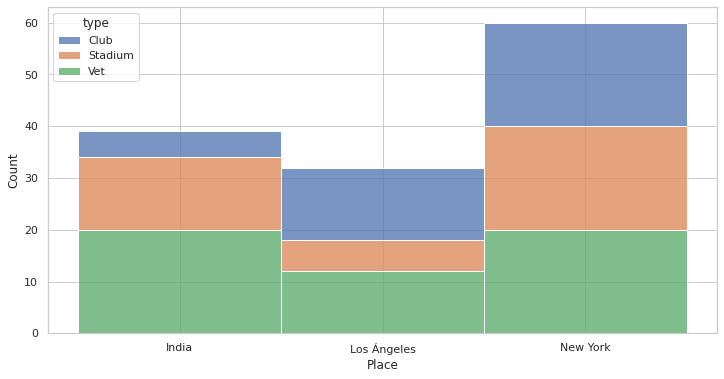

In [494]:
sns.histplot(data = dfdefinitivo,x="Place",hue = "type",multiple="stack",palette="deep")

In [398]:
India = geopandas.GeoDataFrame(india, geometry = geopandas.points_from_xy(india.lon,india.lat))
LA = geopandas.GeoDataFrame(la, geometry = geopandas.points_from_xy(la.lon,la.lat))
NY = geopandas.GeoDataFrame(ny, geometry = geopandas.points_from_xy(ny.lon,ny.lat))

In [399]:
collectionindia=client.Ironhack["India"]
collectionla = client.Ironhack["LA"]
collectionny = client.Ironhack["NY"]

In [400]:
collectionindia.create_index([("geometry", GEOSPHERE)])
collectionla.create_index([("geometry", GEOSPHERE)])
collectionny.create_index([("geometry", GEOSPHERE)])

'geometry_2dsphere'

In [401]:
India["geometry"]=India["geometry"].apply(lambda x:shapely.geometry.mapping(x))
LA["geometry"]=LA["geometry"].apply(lambda x:shapely.geometry.mapping(x))
NY["geometry"]=NY["geometry"].apply(lambda x:shapely.geometry.mapping(x))

/home/luisserrano/anaconda3/envs/Ironhack/lib/python3.8/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/home/luisserrano/anaconda3/envs/Ironhack/lib/python3.8/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/home/luisserrano/anaconda3/envs/Ironhack/lib/python3.8/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [402]:
India = India.to_dict(orient='records')
LA = LA.to_dict(orient='records')
NY = NY.to_dict(orient='records')

In [403]:
collectionindia.insert_many(India)
collectionla.insert_many(LA)
collectionny.insert_many(NY)

In [404]:
MIN = db.get_collection("India")
MLA = db.get_collection("LA")
MNY = db.get_collection("NY")

### Amos a hacer geo pandas letsgo

In [405]:
DIN ={"type":"Point","coordinates":[78.434422,17.415429]}
DLA ={"type":"Point","coordinates":[-118.378335,34.09316]}
DNY ={"type":"Point","coordinates":[-73.98618,40.743877]}

In [406]:
SearchIndia = {"geometry": {"$near": {"$geometry": DIN, "$maxDistance": 100000}}}
SearchLA = {"geometry": {"$near": {"$geometry": DLA, "$maxDistance": 100000}}}
SearchNY = {"geometry": {"$near": {"$geometry": DNY, "$maxDistance": 100000}}}

In [407]:
LocationsIndia = list(MIN.find(SearchIndia))
LocationsIndia

[{'_id': ObjectId('619285b480c9c95aadf55c7a'),
  'type': 'Vet',
  'name': 'ADORABLES Pet Clinic 🐾',
  'geometry': {'type': 'Point', 'coordinates': [78.434473, 17.4138743]},
  'lat': 17.4138743,
  'lon': 78.434473},
 {'_id': ObjectId('619285b480c9c95aadf55c5c'),
  'type': 'Club',
  'name': 'S.A Haneef Cool Drinks Shop',
  'geometry': {'type': 'Point', 'coordinates': [78.437608, 17.414345]},
  'lat': 17.414345,
  'lon': 78.437608},
 {'_id': ObjectId('619285b480c9c95aadf55c5d'),
  'type': 'Club',
  'name': 'Xenia Lounge',
  'geometry': {'type': 'Point',
   'coordinates': [78.43329299999999, 17.4119203]},
  'lat': 17.4119203,
  'lon': 78.43329299999999},
 {'_id': ObjectId('619285b480c9c95aadf55c5e'),
  'type': 'Club',
  'name': 'Touch Restaurant',
  'geometry': {'type': 'Point', 'coordinates': [78.4382497, 17.416468]},
  'lat': 17.416468,
  'lon': 78.4382497},
 {'_id': ObjectId('619285b480c9c95aadf55c6f'),
  'type': 'Vet',
  'name': 'Claws & Paws',
  'geometry': {'type': 'Point', 'coordina

In [408]:
LocationsLA = list(MLA.find(SearchLA))
LocationsIndia

[{'_id': ObjectId('619285b480c9c95aadf55c7a'),
  'type': 'Vet',
  'name': 'ADORABLES Pet Clinic 🐾',
  'geometry': {'type': 'Point', 'coordinates': [78.434473, 17.4138743]},
  'lat': 17.4138743,
  'lon': 78.434473},
 {'_id': ObjectId('619285b480c9c95aadf55c5c'),
  'type': 'Club',
  'name': 'S.A Haneef Cool Drinks Shop',
  'geometry': {'type': 'Point', 'coordinates': [78.437608, 17.414345]},
  'lat': 17.414345,
  'lon': 78.437608},
 {'_id': ObjectId('619285b480c9c95aadf55c5d'),
  'type': 'Club',
  'name': 'Xenia Lounge',
  'geometry': {'type': 'Point',
   'coordinates': [78.43329299999999, 17.4119203]},
  'lat': 17.4119203,
  'lon': 78.43329299999999},
 {'_id': ObjectId('619285b480c9c95aadf55c5e'),
  'type': 'Club',
  'name': 'Touch Restaurant',
  'geometry': {'type': 'Point', 'coordinates': [78.4382497, 17.416468]},
  'lat': 17.416468,
  'lon': 78.4382497},
 {'_id': ObjectId('619285b480c9c95aadf55c6f'),
  'type': 'Vet',
  'name': 'Claws & Paws',
  'geometry': {'type': 'Point', 'coordina

In [409]:
LocationsNY = list(MNY.find(SearchNY))
LocationsNY

[{'_id': ObjectId('619285b480c9c95aadf55cb4'),
  'type': 'Club',
  'name': 'The Seville',
  'geometry': {'type': 'Point',
   'coordinates': [-73.98552699999999, 40.7445945]},
  'lat': 40.7445945,
  'lon': -73.98552699999999},
 {'_id': ObjectId('619285b480c9c95aadf55ca1'),
  'type': 'Club',
  'name': 'John Doe Bar & Kitchen',
  'geometry': {'type': 'Point', 'coordinates': [-73.9869413, 40.744724]},
  'lat': 40.744724,
  'lon': -73.9869413},
 {'_id': ObjectId('619285b480c9c95aadf55caa'),
  'type': 'Club',
  'name': 'BLACKBARN Restaurant',
  'geometry': {'type': 'Point', 'coordinates': [-73.9871592, 40.743099]},
  'lat': 40.743099,
  'lon': -73.9871592},
 {'_id': ObjectId('619285b480c9c95aadf55cb2'),
  'type': 'Club',
  'name': 'The Crooked Knife',
  'geometry': {'type': 'Point', 'coordinates': [-73.9841922, 40.74513]},
  'lat': 40.74513,
  'lon': -73.9841922},
 {'_id': ObjectId('619285b480c9c95aadf55caf'),
  'type': 'Club',
  'name': 'PS 450',
  'geometry': {'type': 'Point', 'coordinates

In [431]:
dfIndia = pd.DataFrame(LocationsIndia)
dfLA = pd.DataFrame(LocationsLA)
dfNY = pd.DataFrame(LocationsNY)
dfIndia.head()

,_id,type,name,geometry,lat,lon
0,619285b480c9c95aadf55c7a,Vet,ADORABLES Pet Clinic 🐾,"{'type': 'Point', 'coordinates': [78.434473, 1...",17.413874,78.434473
1,619285b480c9c95aadf55c5c,Club,S.A Haneef Cool Drinks Shop,"{'type': 'Point', 'coordinates': [78.437608, 1...",17.414345,78.437608
2,619285b480c9c95aadf55c5d,Club,Xenia Lounge,"{'type': 'Point', 'coordinates': [78.433292999...",17.411920,78.433293
3,619285b480c9c95aadf55c5e,Club,Touch Restaurant,"{'type': 'Point', 'coordinates': [78.4382497, ...",17.416468,78.438250
4,619285b480c9c95aadf55c6f,Vet,Claws & Paws,"{'type': 'Point', 'coordinates': [78.4387655, ...",17.415216,78.438766


In [ ]:

# Añadimos la etiqueta de ubicación para las oficinas
etiquetaNY = folium.Marker(location=NYCO, tooltip = “Oficina NY”)
etiquetaNY.add_to(mapNY)
etiquetaLA = folium.Marker(location=LACO, tooltip = “Oficina LA”)
etiquetaLA.add_to(mapLA)

In [440]:
indiamap = gpd.GeoDataFrame(dfIndia, geometry=gpd.points_from_xy(dfIndia.lon, dfIndia.lat))
indiamap.head()

,_id,type,name,geometry,lat,lon
0,619285b480c9c95aadf55c7a,Vet,ADORABLES Pet Clinic 🐾,POINT (78.43447 17.41387),17.413874,78.434473
1,619285b480c9c95aadf55c5c,Club,S.A Haneef Cool Drinks Shop,POINT (78.43761 17.41435),17.414345,78.437608
2,619285b480c9c95aadf55c5d,Club,Xenia Lounge,POINT (78.43329 17.41192),17.411920,78.433293
3,619285b480c9c95aadf55c5e,Club,Touch Restaurant,POINT (78.43825 17.41647),17.416468,78.438250
4,619285b480c9c95aadf55c6f,Vet,Claws & Paws,POINT (78.43877 17.41522),17.415216,78.438766


In [477]:
mapindia = Map(location = [17.415429,78.426530], zoom_start = 15)
etiquetaindia = folium.Marker(location=[17.415429,78.426530], tooltip = "Oficina en INDIA")
etiquetaindia.add_to(mapindia)
mapindia

In [478]:
for i,row in indiamap.iterrows():
    tipo = {"location": [row["lat"], row["lon"]], "tooltip": row["name"]}
    
    if row["type"] == "Vet":
        icono = Icon(color = "green",
                     prefix="fa",
                     icon="fa-heart",
                     icon_color="black"
        )
    elif row["type"] == "Club":
        icono = Icon(color = "pink",
                     prefix="fa",
                     icon="glass",
                     icon_color="black")
        
    elif row["type"] == "Stadium":
        icono = Icon(color = "orange",
                     prefix="fa",
                     icon="fa-futbol-o",
                     icon_color="black")
        
    mark = Marker(**tipo, icon=icono)
    mark.add_to(mapindia)
mapindia

In [451]:
lamap = gpd.GeoDataFrame(dfLA, geometry=gpd.points_from_xy(dfLA.lon,dfLA.lat))
#lamap

In [479]:
mapla = Map(location = [34.09316,-118.378335], zoom_start = 15)
etiquetala = folium.Marker(location=[34.09316,-118.378335], tooltip = "Oficina en Los Ángeles")
etiquetala.add_to(mapla)
mapla

In [480]:
for i,row in lamap.iterrows():
    tipo = {"location": [row["lat"], row["lon"]], "tooltip": row["name"]}
    
    if row["type"] == "Vet":
        icono = Icon(color = "green",
                     prefix="fa",
                     icon="fa-heart",
                     icon_color="black"
        )
    elif row["type"] == "Club":
        icono = Icon(color = "pink",
                     prefix="fa",
                     icon="glass",
                     icon_color="black")
        
    elif row["type"] == "Stadium":
        icono = Icon(color = "orange",
                     prefix="fa",
                     icon="fa-futbol-o",
                     icon_color="black")
        
    mark = Marker(**tipo, icon=icono)
    mark.add_to(mapla)
mapla

In [427]:
nymap = gpd.GeoDataFrame(dfNY, geometry=gpd.points_from_xy(dfNY.lon,dfNY.lat))
nymap

,_id,type,name,geometry,lat,lon
0,619285b480c9c95aadf55cb4,Club,The Seville,POINT (-73.98553 40.74459),40.744594,-73.985527
1,619285b480c9c95aadf55ca1,Club,John Doe Bar & Kitchen,POINT (-73.98694 40.74472),40.744724,-73.986941
2,619285b480c9c95aadf55caa,Club,BLACKBARN Restaurant,POINT (-73.98716 40.74310),40.743099,-73.987159
3,619285b480c9c95aadf55cb2,Club,The Crooked Knife,POINT (-73.98419 40.74513),40.745130,-73.984192
4,619285b480c9c95aadf55caf,Club,PS 450,POINT (-73.98317 40.74501),40.745012,-73.983167
5,619285b480c9c95aadf55ca2,Club,Roof at Park South,POINT (-73.98345 40.74238),40.742380,-73.983454
6,619285b480c9c95aadf55ca6,Club,The Clocktower,POINT (-73.98737 40.74130),40.741295,-73.987368
7,619285b480c9c95aadf55cb1,Club,Ayza Wine & Chocolate Bar,POINT (-73.98690 40.74710),40.747096,-73.986904
8,619285b480c9c95aadf55ca5,Club,Patent Pending,POINT (-73.99027 40.74532),40.745322,-73.990272
9,619285b480c9c95aadf55ca8,Club,Cloud Social Rooftop Bar,POINT (-73.98633 40.74732),40.747317,-73.986325


In [481]:
mapny = Map(location = [40.743877,-73.98618], zoom_start = 15)
etiquetany = folium.Marker(location=[40.743877,-73.98618], tooltip = "Oficina en Nueva York")
etiquetany.add_to(mapny)
#mapny

In [482]:
for i,row in nymap.iterrows():
    tipo = {"location": [row["lat"], row["lon"]], "tooltip": row["name"]}
    
    if row["type"] == "Vet":
        icono = Icon(color = "green",
                     prefix="fa",
                     icon="fa-heart",
                     icon_color="black"
        )
    elif row["type"] == "Club":
        icono = Icon(color = "pink",
                     prefix="fa",
                     icon="glass",
                     icon_color="black")
        
    elif row["type"] == "Stadium":
        icono = Icon(color = "orange",
                     prefix="fa",
                     icon="fa-futbol-o",
                     icon_color="black")
        
    mark = Marker(**tipo, icon=icono)
    mark.add_to(mapny)
mapny